In [223]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

ARMA- Auto Regressive Moving Average

STEP 1: Importing the data

In [224]:
df = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv", index_col= "Date", parse_dates= True)

In [225]:
df.shape

(365, 1)

In [226]:
df.index.freq = 'D'

In [227]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Plotting the data

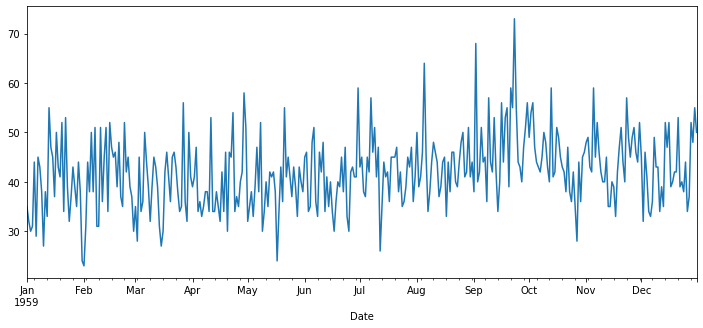

In [228]:
df["Births"].plot(figsize = (12, 5));

2. Check the stationarity                                 
ADFuller test to check stationarity

In [229]:
from statsmodels.tsa.stattools import adfuller

In [230]:
result_adf = adfuller(df["Births"], autolag= "t-stat")

In [231]:
result_adf

(-4.808291253559764,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 3.293953978181733)

Since p value less than 0.05, null hypothesis is rejected, data is stationary

3. Determine the orders.                     
Determine the orders p,q of ARMA using auto_arima

In [232]:
from pmdarima import auto_arima

In [233]:
auto_arima(df["Births"], seasonal= False, d= 0)

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

4. Dividing the data into train and test

In [234]:
train = df.iloc[:90]
test = df.iloc[90:]

5. Fit an ARMA model

In [235]:
from statsmodels.tsa.arima_model import ARMA

In [236]:
model = ARMA(df["Births"], order = (2, 2))
results = model.fit()

In [237]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:                     ARMA(2, 2)   Log Likelihood               -1227.849
Method:                       css-mle   S.D. of innovations              6.969
Date:                Thu, 02 Jun 2022   AIC                           2467.698
Time:                        11:45:49   BIC                           2491.097
Sample:                    01-01-1959   HQIC                          2476.997
                         - 12-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.8158      1.394     29.990      0.000      39.083      44.549
ar.L1.Births     0.0201      0.027      0.731      0.465      -0.034       0.074
ar.L2.Births     0.9454      0.025     37.822      0.000       0.896       0.994
ma.L1.Births     0.0729      0.052      1.411      0.158      -0.028       0.174
ma.L2.Births    -0.9271      0.052    -17.971      0.000      -1.028      -0.826
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0179           +0.0000j            1.0179            0.0000
AR.2           -1.0391           +0.0000j            1.0391            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.0787           +0.0000j            1.0787            0.0000
-----------------------------------------------------------------------------
"""

6. Predicitng the future values

In [238]:
start = len(train)
end = len(train) + len(test) -1

In [239]:
predictions = results.predict(start = start, end = end).rename("ARMA(2, 2)")

7. Plotting the predicted values along with the actual value

[Text(0.5, 1.0, 'Daily Total Female Births'), Text(0, 0.5, 'Births')]

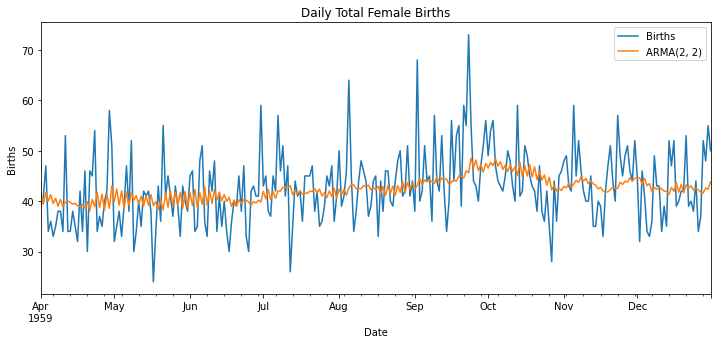

In [240]:
title = 'Daily Total Female Births'
ylabel='Births'
ax = test["Births"].plot(figsize = (12, 5), legend = True)
predictions.plot(legend = True)
ax.set(title = title, ylabel=ylabel)

ARIMA 

1. Reading and plotting

In [241]:
df = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/TradeInventories.csv", index_col= "Date", parse_dates= True)

In [242]:
df.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


In [243]:
df.tail()

,Inventories
Date,
2018-08-01,2127170
2018-09-01,2134172
2018-10-01,2144639
2018-11-01,2143001
2018-12-01,2158115


In [265]:
df.index.freq = "MS"

Plotting the Data

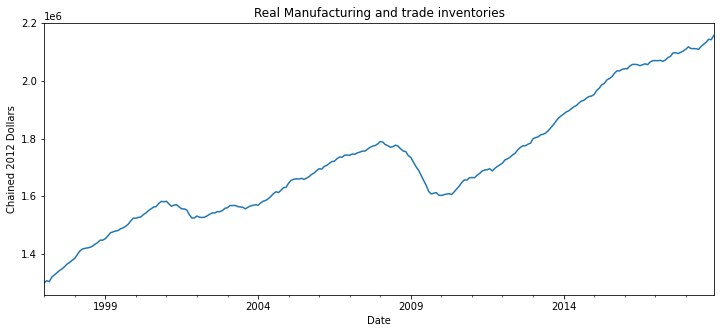

In [266]:
df["Inventories"].plot(figsize = (12, 5))
plt.title("Real Manufacturing and trade inventories")
plt.ylabel("Chained 2012 Dollars")
plt.autoscale(axis = 'x', tight= True)

Running ETS Decomposition

In [267]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [268]:
result = seasonal_decompose(df['Inventories'], model= "add")
result

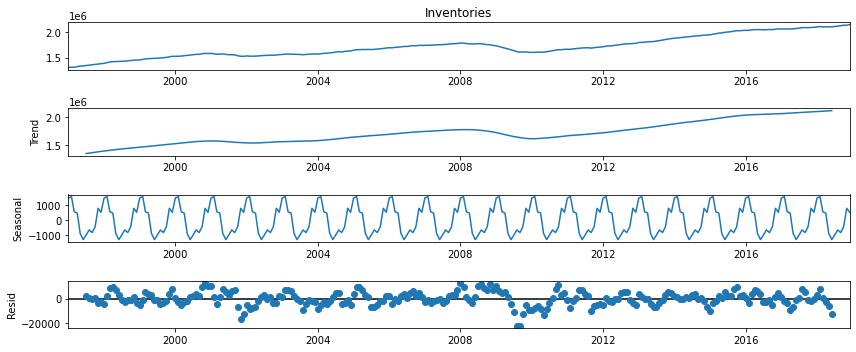

In [269]:
result.plot();

Here we observe that stationarity does not affect much (of the order 10^3)

<AxesSubplot:xlabel='Date'>

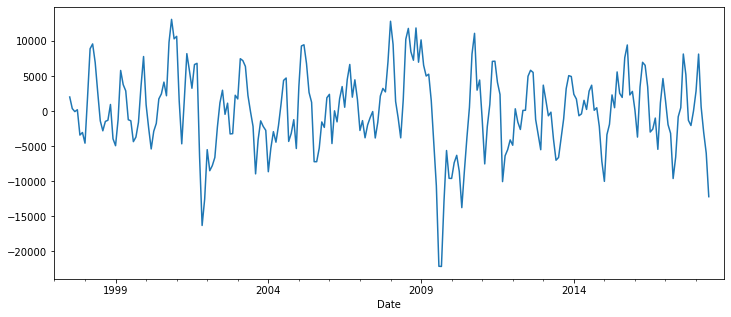

In [270]:
result.resid.plot()

2. Checking the stationarity

ADF FULLER TEST

In [278]:
from statsmodels.tsa.stattools import adfuller

In [279]:
result_adf = adfuller(df["Inventories"], autolag= "t-stat")

In [280]:
result_adf

(0.24794100403277067,
 0.9748258536511571,
 12,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 2.30104851579406)

Since p value > 0.05, null hypothesis is accepted, Data is not statioanry

3. Determine the orders (p, d, q)

In [316]:
from pmdarima import auto_arima

In [320]:
auto_arima(df["Inventories"], seasonal= False, d = 1, method = "bfgs").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2667.760
Date:                Thu, 02 Jun 2022   AIC                           5343.520
Time:                        12:31:13   BIC                           5357.808
Sample:                             0   HQIC                          5349.262
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    644.3406    637.720      1.010      0.312    -605.567    1894.248
ar.L1          0.8017      0.196      4.090      0.000       0.418       1.186
ma.L1         -0.7935      0.198     -4.008      0.000      -1.182      -0.405
sigma2      3.896e+07      0.046   8.46e+08      0.000     3.9e+07     3.9e+07
===================================================================================
Ljung-Box (L1) (Q):                  76.20   Jarque-Bera (JB):                90.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -1.12
Prob(H) (two-sided):                  0.52   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.76e+23. Standard errors may be unstable.
"""

Running the adf test for the first difference

In [321]:
from statsmodels.tsa.statespace.tools import diff
df_diff_1 = diff(df["Inventories"], k_diff= 1)

In [323]:
adfuller(df_diff_1)

(-3.412249391934806,
 0.010548311489190432,
 4,
 258,
 {'1%': -3.455952927706342,
  '5%': -2.8728086526320302,
  '10%': -2.572774990685656},
 4888.3029144158)

Hence after 1st order differencing the data becomes stationary"

4. Dividing the data into test and train

In [339]:
train = df.iloc[:252]
test = df.iloc[252:]

5. Fitting the ARIMA model

In [340]:
from statsmodels.tsa.arima_model import ARIMA

In [341]:
model = ARIMA(train["Inventories"], order= (1, 1, 1))
result = model.fit()

In [342]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Thu, 02 Jun 2022   AIC                           4980.790
Time:                        13:54:12   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.871      2.378      0.017     561.672    5833.468
ar.L1.D.Inventories     0.9026      0.039     23.010      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

6. Predicitng the future values

In [343]:
start = len(train)
end = len(train) + len(test) -1

In [349]:
test["Inventories"]

Date
2018-01-01    2110158
2018-02-01    2118199
2018-03-01    2112427
2018-04-01    2112276
2018-05-01    2111835
2018-06-01    2109298
2018-07-01    2119618
2018-08-01    2127170
2018-09-01    2134172
2018-10-01    2144639
2018-11-01    2143001
2018-12-01    2158115
Freq: MS, Name: Inventories, dtype: int64

In [351]:
predictions = result.predict(start = start, end = end, typ= "levels").rename("ARIMA(1, 1, 1)")
predictions

2018-01-01    2.107148e+06
2018-02-01    2.110526e+06
2018-03-01    2.113886e+06
2018-04-01    2.117231e+06
2018-05-01    2.120561e+06
2018-06-01    2.123878e+06
2018-07-01    2.127184e+06
2018-08-01    2.130479e+06
2018-09-01    2.133764e+06
2018-10-01    2.137041e+06
2018-11-01    2.140311e+06
2018-12-01    2.143573e+06
Freq: MS, Name: ARIMA(1, 1, 1), dtype: float64

7. Plotting the predicted values along with the actual value

<AxesSubplot:title={'center':'Real Manufacturing and Trade Inventories'}, xlabel='Date', ylabel='Chained 2012 Dollars'>

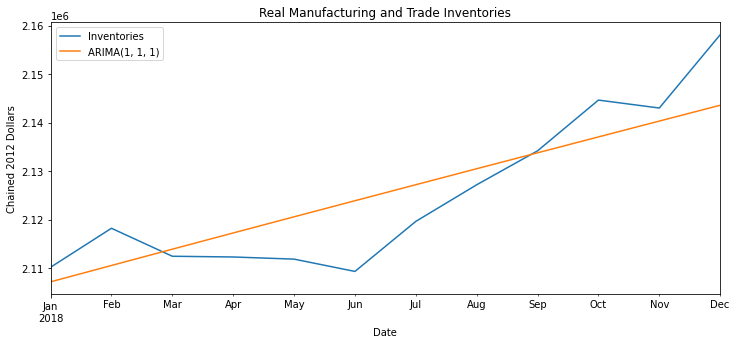

In [354]:
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
ax = test["Inventories"].plot(figsize = (12, 5), legend = True)
ax.set(title = title, ylabel=ylabel)
predictions.plot(legend = True)

8. Evaluate the model

In [355]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [379]:
def rmse(test, predicted):
    return(np.sqrt(mean_squared_error(test, predicted)))

In [380]:
errors = [mean_squared_error, mean_absolute_error, rmse]

In [381]:
for error in errors:
    value = error(test["Inventories"], predictions)
    print("ARIMA (1, 1, 1) {}: {}".format(str(error).split(" ")[1], value))

ARIMA (1, 1, 1) mean_squared_error: 60677823.81546096
ARIMA (1, 1, 1) mean_absolute_error: 6376.3135046000825
ARIMA (1, 1, 1) rmse: 7789.597153605631


9. Training the model on the entire dataset

In [384]:
model = ARIMA(df["Inventories"], order= (1,1,1))
result = model.fit()

In [385]:
future_prediction = result.predict(start = len(df), end = len(df)+ 12, typ = "levels").rename("ARIMA (1,1,1), Forecast")

Plotting the forecasted value along with the time series

[Text(0, 0.5, 'Chained 2012 Dollars'),
 Text(0.5, 1.0, 'Real Manufacturing and Trade Inventories')]

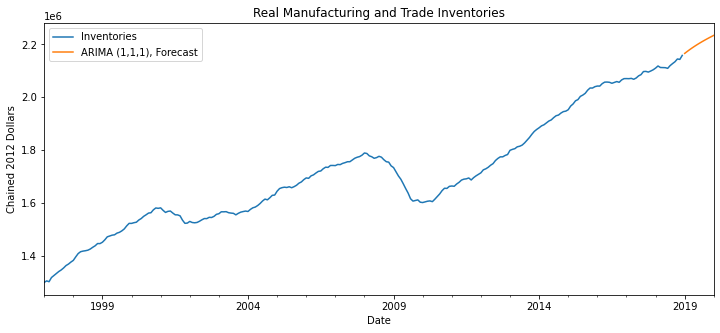

In [391]:
ax = df["Inventories"].plot(figsize = (12, 5), legend = True)
future_prediction.plot(legend = True)
ax.set(ylabel = ylabel, title = title)